# ARIMA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels as sm
import statsmodels.api as smt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)

In [3]:
ori_data = pd.read_csv('../data/data_indicators/BTC_data_1d_2019-01-01.csv',index_col= 0)
ori_data['Open time'] = pd.to_datetime(ori_data['Open time'])
ori_data = ori_data.set_index('Open time')

In [4]:
diff_data = pd.Series.diff(ori_data.Close).dropna()
close = ori_data.Close

diff_data_train = diff_data[:int(np.ceil(diff_data.shape[0]*0.8))]
diff_data_test = diff_data[int(np.ceil(diff_data.shape[0]*0.8)):]

Results of Dickey-Fuller Test:
Test Statistic                 -29.5242
pvalue                           0.0000
#Lags Used                       0.0000
Number of Observations Used    768.0000
Critical Value (1%)             -3.4389
Critical Value (5%)             -2.8653
Critical Value (10%)            -2.5688
dtype: float64


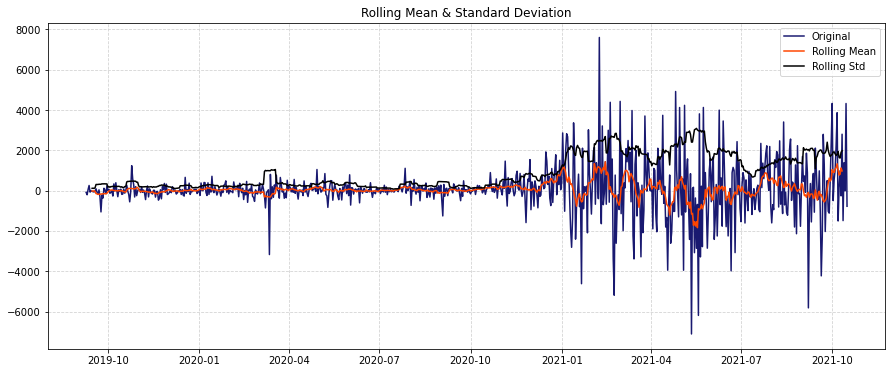

In [5]:
from ts_toolbox import plot_curve
from ts_toolbox import test_stationarity

test_stationarity(diff_data_train)   
plot_curve(diff_data_train)

/Users/cholian/opt/anaconda3/envs/DS/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


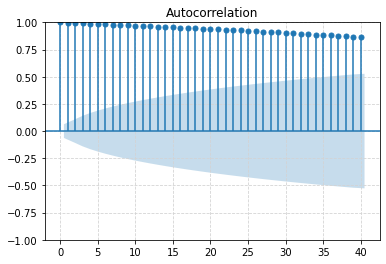

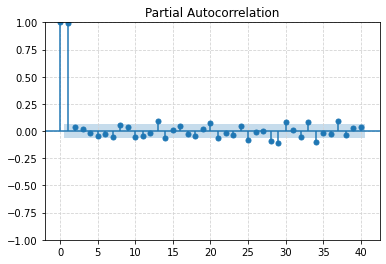

In [6]:
smt.graphics.tsa.plot_acf(close, lags=40, alpha = 0.05)
plt.grid(linestyle = "--",color='lightgrey')         # set grids to the plot
smt.graphics.tsa.plot_pacf(close, lags=40, alpha = 0.05)
plt.grid(linestyle = "--",color='lightgrey')         # set grids to the plot
plt.show()

/Users/cholian/opt/anaconda3/envs/DS/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

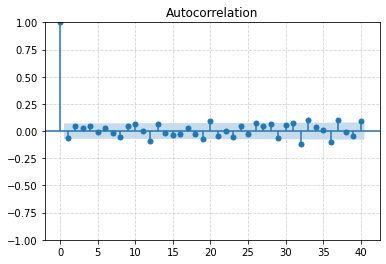

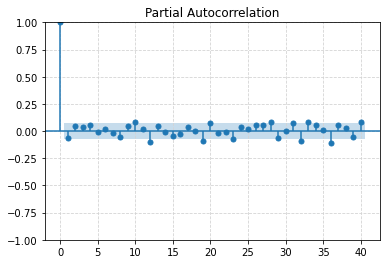

In [7]:
# For differenced time series
ax = plt.figure()
#sns.set_theme(style='darkgrid')
smt.graphics.tsa.plot_acf(diff_data_train, lags=40, alpha = 0.05)
plt.grid(linestyle = "--",color='lightgrey')         # set grids to the plot
smt.graphics.tsa.plot_pacf(diff_data_train, lags=40, alpha = 0.05)
plt.grid(linestyle = "--",color='lightgrey')         # set grids to the plot
plt.show()

In [8]:
from statsmodels.tsa.arima.model import ARIMA

In [9]:
p = 2; d = 1; q = 2

In [10]:
m_arima = ARIMA(endog = diff_data_train,order = (p,d,q))

/Users/cholian/opt/anaconda3/envs/DS/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/cholian/opt/anaconda3/envs/DS/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/cholian/opt/anaconda3/envs/DS/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [11]:
model = m_arima.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  769
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -6557.182
Date:                Sat, 30 Apr 2022   AIC                          13124.364
Time:                        15:17:30   BIC                          13147.582
Sample:                    09-09-2019   HQIC                         13133.300
                         - 10-16-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5953      0.203      2.940      0.003       0.198       0.992
ar.L2          0.0970      0.024      4.067      0.000       0.050       0.144
ma.L1         -1.6578      0.206     -8.038      0.0

In [12]:
model.forecast()

2021-10-17 00:00:00+00:00    402.485579
Freq: D, dtype: float64

# PCA

In [94]:
import pandas as pd
ind_data = pd.read_csv('../data/raw_data/All_indicator_1d.csv',index_col= 0)
price_data = pd.read_csv('../data/data_indicators/BTC_data_1d_2019-01-01.csv',index_col= 0)

from ds_toolbox import dp_mv_DropCols

ind_data = dp_mv_DropCols(ind_data,0.5)

# import matplotlib.pyplot as plt
# import missingno as msno

# missing value EDA
# reference: https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/
# msno.matrix(ori_data)
# plt.savefig('plots/Missing values.png')
# plt.show()

ind_data = ind_data.dropna().reset_index(drop = True)

price_data['date'] = pd.to_datetime(price_data['Open time']).dt.strftime('%Y-%m-%d')
data = ind_data.merge(price_data,how = 'left', on='date')
data['close'] = data.Close

data = data.drop(price_data.columns,axis = 1)

In [95]:
# version 1: PCA for original data
data_diff = data
data_diff['next_close'] = data.close.diff().apply(lambda x: 1 if x>0 else 0).shift(1)

# version 2: PCA for change
# data_diff = data.diff()
# data_diff = data_diff.iloc[1:,]
# data_diff.close = data_diff.close.apply(lambda x: 1 if x>=0 else 0)
# data_diff['next_close'] = data_diff.close.shift(1)

data_diff = data_diff.dropna()
data = data_diff.drop(['close','next_close'],axis=1)
label = data_diff.next_close

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_arr = scaler.fit_transform(data) 

In [97]:

# data_arr = data.to_numpy()

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
projected = pca.fit_transform(data_arr)

In [98]:
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
components = pca.fit_transform(data_arr)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=label,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()
fig.write_html("plots/PCA_original data.html")
# fig.write_html("plots/PCA_pct data.html")

In [50]:
pca = PCA()
components = pca.fit_transform(data_arr)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(5),
    color=label
)
fig.update_traces(diagonal_visible=False)
fig.show()
# fig.write_html("plots/PCAs_original data.html")
fig.write_html("plots/PCAs_pct data.html")

In [51]:
import umap.umap_ as umap
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title='', size = 20):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=color, s = size)
        plt.title(title, fontsize=18)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=color, s = size)
        plt.title(title, fontsize=18)
    if n_components == 3:
        fig = px.scatter_3d(x=u[:,0], y=u[:,1], z=u[:,2],color=color, title=title, color_continuous_scale='blues')
        fig.update_traces(marker=dict(size=size, 
                              line=dict(width=0)))
        fig.update_layout(
            margin=dict(l=0, r=0, t=0, b=0),
            paper_bgcolor="LightSteelBlue",
        )
        fig.show()
        return fig
    
def draw_tsne(n_iter=1000, n_components=2, metric='euclidean', title='', size = 20):
    fit = TSNE(
        n_iter=n_iter,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(data);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=color, s = size)
        plt.title(title, fontsize=18)
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=color, s = size)
        plt.title(title, fontsize=18)
    if n_components == 3:
        fig = px.scatter_3d(x=u[:,0], y=u[:,1], z=u[:,2],color=color,title=title, color_continuous_scale = 'blues')
        fig.update_traces(marker=dict(size=size, 
                                 line=dict(width=0)))
        fig.update_layout(
            margin=dict(l=0, r=0, t=0, b=0),
            paper_bgcolor="LightSteelBlue",
        )
        fig.show()
        return fig

In [52]:
data = data_arr
color = label
fig = draw_umap(n_components=3, size = 5, title='UMAP Transformation of Patients')
# fig.write_html("plots/UMAP_original data.html")
fig.write_html("plots/UMAP_pct data.html")

<Figure size 432x288 with 0 Axes>

In [53]:
fig = draw_tsne(n_iter=1000, n_components=3, metric='euclidean', title='', size = 10)
# fig.write_html("plots/tsne_original data.html")
fig.write_html("plots/tsne_pct data.html")

/Users/cholian/opt/anaconda3/envs/anly565/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/cholian/opt/anaconda3/envs/anly565/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



<Figure size 432x288 with 0 Axes>

# Lasso

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ind_data = pd.read_csv('../data/raw_data/All_indicator_1d.csv',index_col= 0)
price_data = pd.read_csv('../data/data_indicators/BTC_data_1d_2019-01-01.csv',index_col= 0)

from ds_toolbox import dp_mv_DropCols

ind_data = dp_mv_DropCols(ind_data,0.5)

price_data['date'] = pd.to_datetime(price_data['Open time']).dt.strftime('%Y-%m-%d')
data = ind_data.merge(price_data,how = 'left', on='date')

data['y_prediction'] = data.Close.shift(-1)
# data['direction'] = (data.Close > data.Open).apply(lambda x: 'up' if x else 'down')
data = data.drop(price_data.columns,axis = 1)
data = data.dropna().reset_index(drop =True)
y = data.y_prediction.values
# data = data.drop('direction',axis = 1)
X = data.drop('y_prediction',axis = 1).to_numpy()
X_train = X[:int(np.ceil(X.shape[0]*0.8)),:]
X_test = X[int(np.ceil(X.shape[0]*0.8)):,:]

y_train = y[:int(np.ceil(X.shape[0]*0.8))]
y_test = y[int(np.ceil(X.shape[0]*0.8)):]

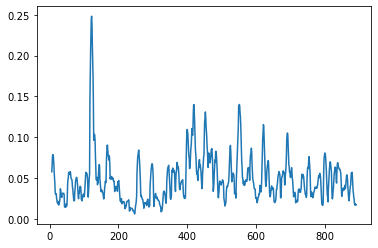

In [6]:
shift_interval = 12
std_price = data.y_prediction.rolling(shift_interval,center=True).std()
mean_price = data.y_prediction.rolling(shift_interval,center=True).mean()
plt.plot(std_price/mean_price)

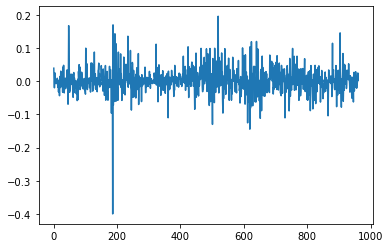

In [ ]:
plt.plot((price_data.Close - price_data.Open)/price_data.Open)

In [3]:
daily_std = (price_data.Close - price_data.Open)/price_data.Open

In [4]:
(daily_std>0.0237).value_counts()

False    754
True     208
dtype: int64

In [55]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [56]:
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train) 
X_test = X_scaler.transform(X_test)

y_train = np.log(y_train)

In [57]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=0.01)
reg.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

# Test data
pred = reg.predict(X_test)

In [58]:
mse_test =mean_squared_error(y_test, np.exp(pred))
mae_test = mean_absolute_error(y_test, np.exp(pred))
mape_test = mean_absolute_percentage_error(y_test, np.exp(pred))

print('MAE test set', round(mae_test, 2))
print('MSE test set', round(mse_test, 2))
print('MAPE test set', round(mape_test, 4))

y_drift = pd.DataFrame(y_test).shift(1).iloc[:,0]

MAE test set 1092.65
MSE test set 2256593.08
MAPE test set 0.0237


In [59]:
result = pd.DataFrame({'y_true':y_test,
                       'y_pred':np.exp(pred),
                       'y_drift':y_drift,
                       'index':[i for i in range(len(pred))] },index = [i for i in range(len(pred))]).melt(id_vars = ['index'])

In [60]:
# drift model accuracy
mean_absolute_percentage_error(y_test[1:], y_drift.to_numpy()[1:])

0.023566100653182473

In [62]:
fig = px.line(result, x="index", y="value", color='variable')
fig.show()
fig.write_html("plots/lasso.html")

In [72]:
a = 0.001
lasso = Lasso(max_iter=10000)
lasso.set_params(alpha=a)
lasso.fit(X_train, y_train)

var_idx = np.where(lasso.coef_>=0.00001)[0]

In [79]:
coef = lasso.coef_[lasso.coef_>=0.00001]
coef_var = data.columns[var_idx]

In [93]:
result = pd.DataFrame({'coef':coef,'coef_name':coef_var}).sort_values(by = 'coef',ascending = False)

In [92]:
fig = px.bar(result, x='coef', y='coef_name')
fig.show()
fig.write_html("plots/lasso_variable_selection.html")

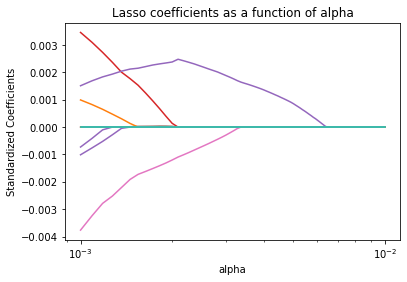

In [162]:
alphas = np.linspace(0.001,0.01,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_[:50])

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

# LSTM

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# ind_data = pd.read_csv('../data/raw_data/All_indicator_1d.csv',index_col= 0)
# price_data = pd.read_csv('../data/data_indicators/BTC_data_1d_2019-01-01.csv',index_col= 0)

# # colab
ind_data = pd.read_csv('All_indicator_1d.csv',index_col= 0)
price_data = pd.read_csv('BTC_data_1d_2019-01-01.csv',index_col= 0)

from ds_toolbox import dp_mv_DropCols
ind_data = dp_mv_DropCols(ind_data,0.5)

price_data['date'] = pd.to_datetime(price_data['Open time']).dt.strftime('%Y-%m-%d')
data = ind_data.merge(price_data,how = 'left', on='date')

from ts_toolbox import plot_multiTS
# fig = plot_multiTS(data, [0, 1,3,4], 'date')

from ts_toolbox import dp_series_to_supervised
data = data.drop(price_data.columns[price_data.columns != 'Close'],axis = 1)
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler(feature_range=(0, 1))
data.iloc[:,:-1] = scaler_x.fit_transform(data.iloc[:,:-1])

scaler_y = MinMaxScaler(feature_range=(0, 1))
data.iloc[:,-1] = scaler_y.fit_transform(data.iloc[:,-1].to_numpy().reshape(-1,1))

data_lstm = dp_series_to_supervised(data, n_in = 10, n_out =1,y = 'Close')
    

from ts_toolbox import dp_train_test_split
data_train, data_test = dp_train_test_split(data_lstm,train_rate = 0.8)

X_train = data_train.drop('Close(t)',axis=1).to_numpy()
y_train = data_train['Close(t)'].to_numpy()

X_test = data_test.drop('Close(t)',axis=1).to_numpy()
y_test = data_test['Close(t)'].to_numpy()

# data_train.drop('Close(t)',axis=1).to_csv('X_train.csv')
# data_train['Close(t)'].to_csv('y_train.csv')

# data_test.drop('Close(t)',axis=1).to_csv('X_test.csv')
# data_test['Close(t)'].to_csv('y_test.csv')

# Colab

In [ ]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from matplotlib import pyplot
import numpy as np

# X_train = pd.read_csv('X_train.csv',index_col = 0).to_numpy()
# y_train = pd.read_csv('y_train.csv',index_col = 0).to_numpy()
# X_test = pd.read_csv('X_test.csv',index_col = 0).to_numpy()
# y_test = pd.read_csv('y_test.csv',index_col = 0).to_numpy()

# reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

# fit network
history = model.fit(X_train, y_train, epochs=100, batch_size=72, validation_data=(X_test, y_test), verbose=2, shuffle=False)

# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

  # make a prediction
ypred = model.predict(X_test)
y_pred = scaler_y.inverse_transform(ypred)
y_true = scaler_y.inverse_transform(y_test.reshape(-1,1))
y_drift = pd.DataFrame(y_true).shift(1).iloc[:,0]
result = pd.DataFrame(data = {
                       'y_true':y_true.reshape(1,-1)[0],
                       'y_pred':y_pred.reshape(1,-1)[0],
                       'y_drift':y_drift
                       }).reset_index(drop = False).melt(id_vars = ['index'])
fig = px.line(result, x="index", y="value", color='variable')
fig.show()